In [1]:
import xgboost as xgb

1. XGBoost way

- xgb.DMatrix() 
    - ```classxgboost.DMatrix```(data, label=None, *, weight=None, base_margin=None, missing=None, silent=False, feature_names=None, feature_types=None, nthread=None, group=None, qid=None, label_lower_bound=None, label_upper_bound=None, feature_weights=None, enable_categorical=False)
- param = {} 
- bst = xgb.train(param) 
- bst.predict()

2. sklearn API
- ```classxgboost.XGBRegressor```(*, objective='reg:squarederror', **kwargs)
- load via numpy/pandas
- fit
- predict

In [107]:
from xgboost import XGBRegressor as XGBR
import sklearn
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error as MSE, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [7]:
data = load_boston()

D:\Users\BlickWinkel\Anaconda3\envs\d2l\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [10]:
X, y = data.data, data.target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=17)

In [30]:
xgbr = XGBR()
xgbr.fit(X_train, y_train)
#xgbr.predict(X_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [31]:
xgbr.score(X_test, y_test)

0.909375720930724

In [32]:
MSE(y_test, xgbr.predict(X_test))

6.872382962992951

In [33]:
xgbr.feature_importances_

array([0.01712512, 0.00196511, 0.01094459, 0.02243611, 0.04697014,
       0.21527706, 0.00785484, 0.05197911, 0.01416677, 0.04804793,
       0.03495161, 0.00797604, 0.5203055 ], dtype=float32)

In [34]:
xgbr = XGBR()

In [38]:
cross_val_score(xgbr, X_train, y_train, cv=5).mean()

0.8297146613068167

In [40]:
cross_val_score(xgbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')#.mean()

array([-20.49075213, -18.2602301 ,  -7.53285261,  -9.66388338,
       -11.18637522])

In [44]:
print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


In [46]:
rfr = RFR()
lr = LR()
print(cross_val_score(rfr, X_train, y_train, cv=5).mean())
print(cross_val_score(lr, X_train, y_train, cv=5).mean())

0.8099498582152922
0.6741906434929164


## 1. n_estimators, subsample and learning_rate

210 0.8297148812456705


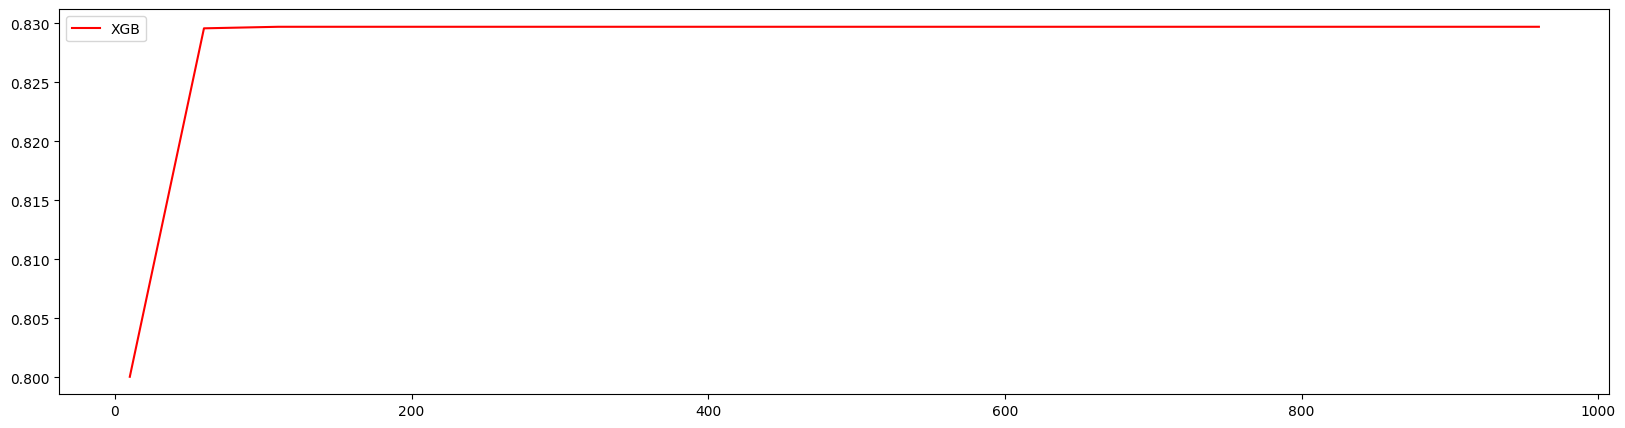

In [49]:
axis_x = range(10, 1010, 50)
rs = []

for i in axis_x:
    xgbr = XGBR(n_estimators=i, random_state=42)
    rs.append(cross_val_score(xgbr, X_train, y_train, cv=5).mean())

print(axis_x[rs.index(max(rs))], max(rs))
plt.figure(figsize=(20, 5))
plt.plot(axis_x, rs, c='red', label='XGB')
plt.legend()
plt.show()

## Variance and Bias

In [59]:
axis_x = range(10, 300, 10)
rs = []
var = []
ge = []

for i in axis_x:
    xgbr = XGBR(n_estimators=i, random_state=42)
    cvs = cross_val_score(xgbr, X_train, y_train, cv=5)
    rs.append(cvs.mean())
    var.append(cvs.var())
    ge.append((1-cvs.mean())**2 + cvs.var())


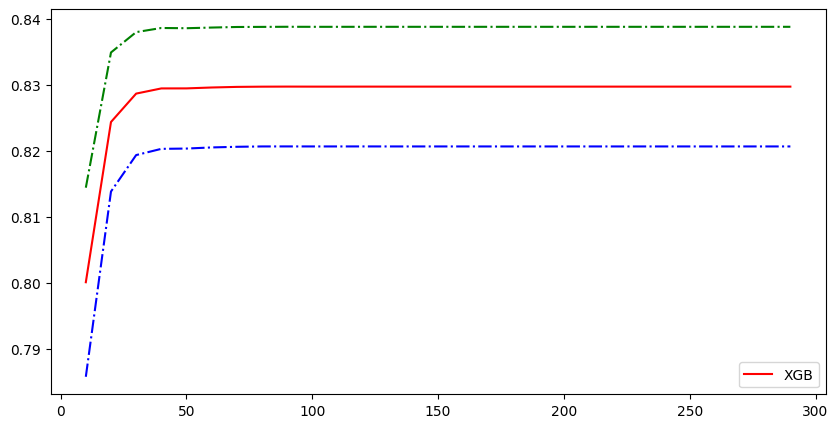

In [60]:
rs = np.array(rs)
var = np.array(var)

plt.figure(figsize=(10, 5))
plt.plot(axis_x, rs, c='red', label='XGB')
plt.plot(axis_x, rs+var, c='green', linestyle='-.')
plt.plot(axis_x, rs-var, c='blue', linestyle='-.')
plt.legend()
plt.show()

In [63]:
axis_x[ge.index(min(ge))]

80

In [65]:
time0 = time()
print(XGBR(n_estimators=100, random_state=42).fit(X_train, y_train).score(X_test, y_test))
print(time() - time0)

0.909375720930724
0.09008455276489258


In [66]:
time0 = time()
print(XGBR(n_estimators=80, random_state=42).fit(X_train, y_train).score(X_test, y_test))
print(time() - time0)

0.9093743998560456
0.07417488098144531


## Subsample

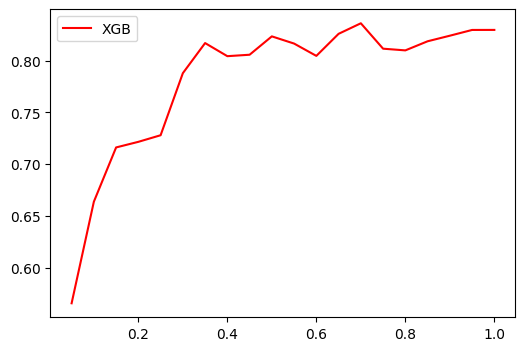

In [72]:
axis_x = np.linspace(0.05, 1, 20)
rs = []

for i in axis_x:
    xgbr = XGBR(n_estimators=80, subsample=i, random_state=42)
    cvs = cross_val_score(xgbr, X_train, y_train, cv=5)
    rs.append(cvs.mean())
    #var.append(cvs.var())
    #ge.append((1-cvs.mean())**2 + cvs.var())

plt.figure(figsize=(6, 4))
plt.plot(axis_x, rs, c='red', label='XGB')
#plt.plot(axis_x, rs+var, c='green', linestyle='-.')
#plt.plot(axis_x, rs-var, c='blue', linestyle='-.')
plt.legend()
plt.show()

In [73]:
axis_x

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

## eta

In [82]:
def reg_assess(reg, X_train, y_train, cv, scoring=["r2"], show=True):
    scores = []
    for i in range(len(scoring)):
        score = cross_val_score(reg, X_train, y_train, cv=cv, scoring=scoring[i]).mean()
        if show:
            print("{}:{:.2f}".format(scoring[i], 
                                     score))
        scores.append(score)
    return scores

In [83]:
xgbr = XGBR(n_estimators=80, random_state=42)

In [80]:
reg_assess(xgbr, X_train, y_train, cv=5)

r2:0.83


0.8297089059248612

In [89]:
for i in np.linspace(0,1,11):
    time0 = time()
    xgbr = XGBR(n_estimators=80, random_state=42, learning_rate=i)
    print("learning_rate = {}".format(i))
    scores = reg_assess(xgbr, X_train, y_train, cv=5)
    print(time() - time0, '\n')

learning_rate = 0.0
r2:-5.63
0.22008514404296875 

learning_rate = 0.1
r2:0.83
0.30744004249572754 

learning_rate = 0.2
r2:0.83
0.3245372772216797 

learning_rate = 0.30000000000000004
r2:0.83
0.3362441062927246 

learning_rate = 0.4
r2:0.82
0.33095669746398926 

learning_rate = 0.5
r2:0.82
0.32411646842956543 

learning_rate = 0.6000000000000001
r2:0.79
0.27539777755737305 

learning_rate = 0.7000000000000001
r2:0.76
0.2602119445800781 

learning_rate = 0.8
r2:0.77
0.25278353691101074 

learning_rate = 0.9
r2:0.76
0.2415769100189209 

learning_rate = 1.0
r2:0.74
0.22362399101257324 



## 2.选择弱评估器: booster(xgb_model)

- gbtree
- gblinear
- dart

In [91]:
for booster in ['gbtree', 'gblinear', 'dart']:
    xgbr = XGBR(n_estimators=80,
                learning_rate=0.1,
                random_state=42,
                booster=booster).fit(X_train, y_train)
    print(booster)
    print(xgbr.score(X_test, y_test))

gbtree
0.9117419790722068
gblinear
0.48141544726213736
dart
0.9117419903286792


## 3. XGB的目标函数: Objective

- $ Obj = \Sigma^{m}_{i=1}l(y_i, \hat{y_i}) + \Sigma^{K}_{k=1}\Omega(f_k) $
    - 通过添加正则项限制模型复杂度
- reg:linear : 回归用
- binary:logistic : 二分类 via logistic regression
- binary:hinge : 二分类 via SVM
- multi-softmax : 多分类
- custom loss function

In [95]:
xgbr = XGBR(n_estimators=80, random_state=42)
xgbr.fit(X_train, y_train)
print(MSE(y_test, xgbr.predict(X_test)))

6.872483145098736


In [96]:
dtrain, dtest = xgb.DMatrix(X_train, y_train), xgb.DMatrix(X_test, y_test)

In [97]:
dtrain

In [104]:
param = {'verbosity':0, 
         'objective':'reg:squarederror', 
         'eta': 0.1}
num_round = 80

In [105]:
bst = xgb.train(param, dtrain, num_round)

In [106]:
preds = bst.predict(dtest)

In [108]:
r2_score(y_test, preds)

0.9117419790722068

In [109]:
MSE(y_test, preds)

6.692940629166069

## 4. 参数化决策树$ f_k(x)$: 参数alpha, lambda

- alpha/reg_alpha: L1 norm default 0
- lambda/reg_lambda: L2  norm default 1

## 5. 让树停止生长: $ \gamma $

- as long as gain > $ \gamma $, split
- large $ \gamma $ ---> less deeper. Compare with min_split_loss, min_samples_split.
- gamma default 0

In [111]:
for i in np.linspace(0,5,51):
    xgbr = XGBR(n_estimators=80, random_state=42, gamma=i)
    scores = reg_assess(xgbr, X_train, y_train, cv=5)

r2:0.83
r2:0.83
r2:0.82
r2:0.83
r2:0.83
r2:0.83
r2:0.83
r2:0.83
r2:0.82
r2:0.82
r2:0.82
r2:0.82
r2:0.82
r2:0.82
r2:0.82
r2:0.82
r2:0.82
r2:0.82
r2:0.83
r2:0.82
r2:0.82
r2:0.82
r2:0.82
r2:0.82
r2:0.82
r2:0.82
r2:0.82
r2:0.81
r2:0.82
r2:0.81
r2:0.82
r2:0.82
r2:0.82
r2:0.82
r2:0.82
r2:0.81
r2:0.82
r2:0.81
r2:0.81
r2:0.81
r2:0.81
r2:0.81
r2:0.82
r2:0.82
r2:0.82
r2:0.82
r2:0.82
r2:0.81
r2:0.82
r2:0.81
r2:0.81


```xgboost.cv```(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(), obj=None, feval=None, maximize=None, early_stopping_rounds=None, fpreproc=None, as_pandas=True, verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True, custom_metric=None)

In [113]:
param = {'verbosity':0, 
         'objective':'reg:squarederror', 
         'gamma': 0}
num_round = 80
n_fold = 5

cv_res = xgb.cv(param, dtrain, num_round, n_fold)

In [114]:
cv_res

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.147005,0.193942,17.319823,0.973259
1,12.457190,0.138991,12.780292,0.780368
2,9.127070,0.093949,9.597813,0.709931
3,6.767556,0.058911,7.464851,0.665840
4,5.099486,0.063172,6.027104,0.623193
...,...,...,...,...
75,0.020414,0.002143,3.614221,0.835490
76,0.019431,0.002037,3.614263,0.835601
77,0.018353,0.001897,3.613887,0.835497
78,0.017348,0.001835,3.614080,0.835477


In [115]:
param = {'verbosity':0, 
         'objective':'reg:squarederror', 
         'gamma': 20}
num_round = 80
n_fold = 5

cv_res = xgb.cv(param, dtrain, num_round, n_fold)

In [118]:
cv_res ## higher training error, less overfitting, better generalization

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.147995,0.193707,17.300719,0.975642
1,12.460929,0.138136,12.756016,0.782104
2,9.122932,0.089203,9.590875,0.672698
3,6.781518,0.053256,7.419898,0.617639
4,5.137184,0.036691,6.031233,0.572387
...,...,...,...,...
75,1.578903,0.073790,3.695446,0.758406
76,1.578903,0.073790,3.695446,0.758406
77,1.578903,0.073790,3.695446,0.758406
78,1.578903,0.073790,3.695446,0.758406


## 6. Other problems in XGBoost

## 6.1 Pruning in XGBoost

- max depth. But similar to $\gamma$ in XGBoost.
- feature extract:
    - colsample_bytree default 1
    - colsample_bylevel default 1
    - colsample_bynode default 1
    - min_child_weight default 1

0.2859673500061035


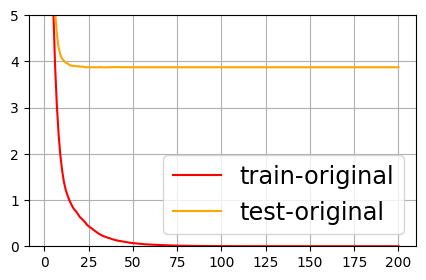

In [124]:
param = {'verbosity':0, 
         'objective':'reg:squarederror', 
         'subsample':1,
         'max_depth':6,
         'eta':0.3,
         'gamma':0,
         'lambda':1,
         'alpha':0,
         'colsample_bytree':1,
         'colsample_bylevel':1,
         'colsample_bynode':1,
         'nfold':5
        }
num_round = 200

time0 = time()
cv_res = xgb.cv(param, dtrain, num_round)

print(time() - time0)

fig, ax = plt.subplots(1, figsize=(5,3))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201), cv_res.iloc[:,0], c='red', label='train-original')
ax.plot(range(1,201), cv_res.iloc[:,2], c='orange', label='test-original')
ax.legend(fontsize='xx-large')
plt.show()

0.23160481452941895
0.21926093101501465


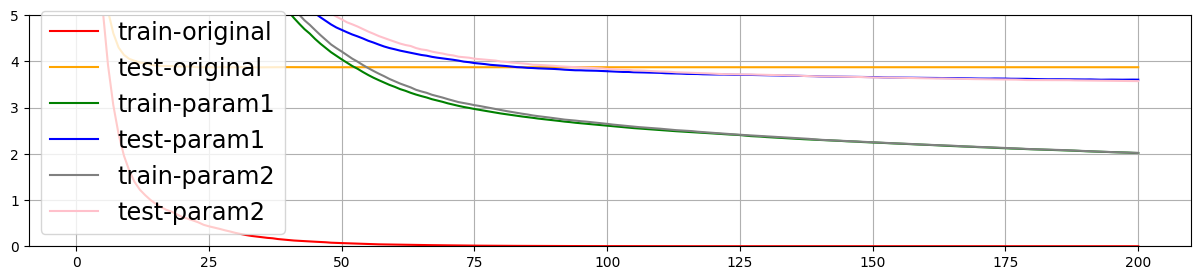

In [175]:
param1 = {'verbosity':0, 
         'objective':'reg:squarederror', 
         'nfold':5,
         'max_depth':2,
         'eta': 0.05,
         'colsample_bytree': 0.5
        }

param2 = {'verbosity':0, 
         'objective':'reg:squarederror', 
         'nfold':5,
         'max_depth':2,
         'eta': 0.05,
         'colsample_bytree': 0.5,
         'colsample_bylevel': 0.7,
        }

num_round = 200

time0 = time()
cv_res1 = xgb.cv(param1, dtrain, num_round)
print(time() - time0)

time0 = time()
cv_res2 = xgb.cv(param2, dtrain, num_round)
print(time() - time0)

fig, ax = plt.subplots(1, figsize=(15,3))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201), cv_res.iloc[:,0], c='red', label='train-original')
ax.plot(range(1,201), cv_res.iloc[:,2], c='orange', label='test-original')
ax.plot(range(1,201), cv_res1.iloc[:,0], c='green', label='train-param1')
ax.plot(range(1,201), cv_res1.iloc[:,2], c='blue', label='test-param1')
ax.plot(range(1,201), cv_res2.iloc[:,0], c='gray', label='train-param2')
ax.plot(range(1,201), cv_res2.iloc[:,2], c='pink', label='test-param2')
ax.legend(fontsize='xx-large')
plt.show()

## 7. Model Storage

- pickle
- joblib

In [165]:
param2 = {'verbosity':0, 
         'objective':'reg:squarederror', 
         'nfold':5,
         'max_depth':2,
         'eta': 0.05,
         'colsample_bytree': 0.5,
         'colsample_bylevel': 0.7,
        }
num_round = 200

bst = xgb.train(param2, dtrain, num_round)

In [166]:
import pickle

In [167]:
pickle.dump(bst, open('xgboost-on-boston.pkl','wb'))

In [168]:
bst_new = pickle.load(open('xgboost-on-boston.pkl','rb'))

In [171]:
r2_score(y_test, bst_new.predict(dtest))

0.8471980835133588

In [172]:
r2_score(y_test, bst.predict(dtest))

0.8471980835133588

In [176]:
import joblib

In [177]:
joblib.dump(bst, 'xgboost-on-boston.dat')

['xgboost-on-boston.dat']

In [178]:
bst_new1 = joblib.load('xgboost-on-boston.dat')

In [179]:
r2_score(y_test, bst_new1.predict(dtest))

0.8471980835133588

## 8. Unbalanced Data

- scale_pos_weight = $ \frac{sum(neg\_samples)}{sum(pos\_samples)} $, default 1

In [189]:
from xgboost import XGBClassifier as XGBC
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score

In [181]:
class1 = 500
class2 = 50

centers = [[0,0], [2,2]]
cluster_std = [1.5, 0.5]

X, y = make_blobs(n_samples=[class1, class2],
                  centers=centers,
                  cluster_std=cluster_std,
                  random_state=42, 
                  shuffle=False)

In [184]:
X

array([[ 0.74507123, -0.20739645],
       [ 0.97153281,  2.28454478],
       [-0.35123006, -0.35120544],
       ...,
       [ 2.36632004,  1.95964171],
       [ 2.0393176 ,  1.00089966],
       [ 2.45816384,  2.17324424]])

In [193]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [201]:
clf = XGBC().fit(X_train, y_train)
pred = clf.predict(X_test)

D:\Users\BlickWinkel\Anaconda3\envs\d2l\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [202]:
clf.score(X_test, y_test)

0.9575757575757575

In [203]:
confusion_matrix(y_test, pred)

array([[140,   4],
       [  3,  18]], dtype=int64)

In [209]:
confusion_matrix(y_test, pred, labels=[1,0])

array([[ 18,   3],
       [  4, 140]], dtype=int64)

In [207]:
recall_score(y_test, pred)

0.8571428571428571

In [215]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.9747023809523809

In [222]:
clf_blc = XGBC(scale_pos_weight=10).fit(X_train, y_train)
pred_blc = clf_blc.predict(X_test)

D:\Users\BlickWinkel\Anaconda3\envs\d2l\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [223]:
clf_blc.score(X_test, y_test)

0.9515151515151515

In [224]:
confusion_matrix(y_test, pred_blc)

array([[139,   5],
       [  3,  18]], dtype=int64)

In [229]:
dtrain, dtest = xgb.DMatrix(X_train, y_train), xgb.DMatrix(X_test, y_test)

In [230]:
param3 = {'verbosity':0, 
          'objective':'binary:logistic', 
          'eta':0.1,
          'scale_pos_weight': 1
        }
num_round = 200

bst = xgb.train(param3, dtrain, num_round)

In [232]:
pred = bst.predict(dtest)

In [236]:
labels = pred.copy()
labels[labels>0.5] = 1
labels[labels<=0.5] = 0

In [237]:
labels

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [238]:
confusion_matrix(y_test, labels)

array([[140,   4],
       [  3,  18]], dtype=int64)